In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt


In [2]:
#load and read data 
df=pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#dscription of columns Columns

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

In [3]:
#EXPORATPRY DATA ANALYSIS 
df.shape

(1338, 7)

In [4]:
#checking the null values 
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
#the are any null values checking now type of data 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
#correlation betweeb variables 
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [9]:
#charges and positively and strong correlated with age  and bmi 
#children and bmi and the least correlarted


Text(0.5, 1.0, 'correlation between variables ')

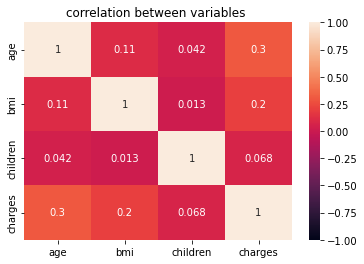

In [10]:
#visualize the corrrelation between features 
heatmap=sns.heatmap(df.corr(),vmin=-1, vmax=1, annot=True);
heatmap.set_title('correlation between variables ')

(array([536., 398., 129.,  86.,  35.,  59.,  57.,  32.,   2.,   4.]),
 array([ 1121.8739  ,  7386.729311, 13651.584722, 19916.440133,
        26181.295544, 32446.150955, 38711.006366, 44975.861777,
        51240.717188, 57505.572599, 63770.42801 ]),
 <BarContainer object of 10 artists>)

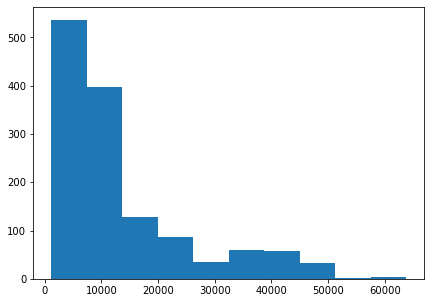

In [11]:
#let's start to analyse the first variable ( charges)
plt.figure(figsize=(7,5))
plt.hist(df.charges)

In [12]:
df['charges'].max()

63770.42801

the most repated values are those between 1121 and 10500 in other hand 
 values between 50900 and 6377 are les occurent in data 
 we can understand that most of client have high charges 
 data is very skewed from the above hitogram ( mean highr than median)
in other advanced project we have to normalize data before machine learning  


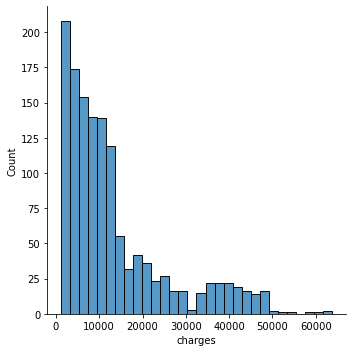

In [13]:
 #another way to vizualise data distribution 
sns.displot(x='charges',data=df)


C:\Users\Toshiba\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

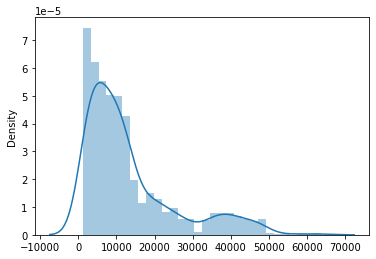

In [14]:
sns.distplot(x=df['charges'],kde=True)

In [15]:
#creatng a function to plot histogram with kde
import scipy.stats as stats

def plots(data,variable ):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    data[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    
    
    plt.show()


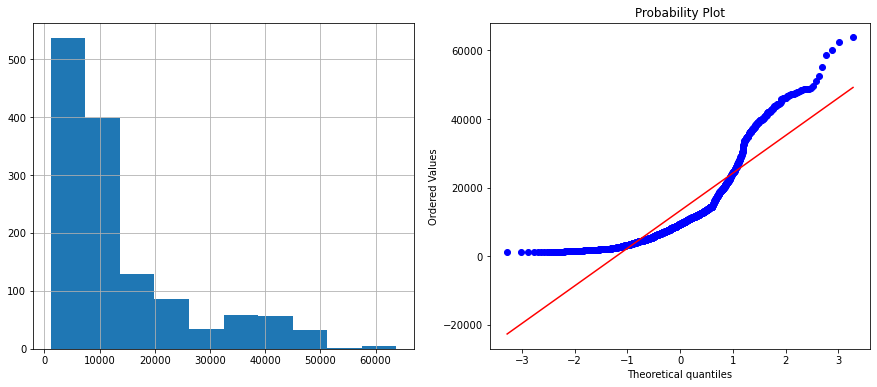

In [16]:
plots(df,'charges')

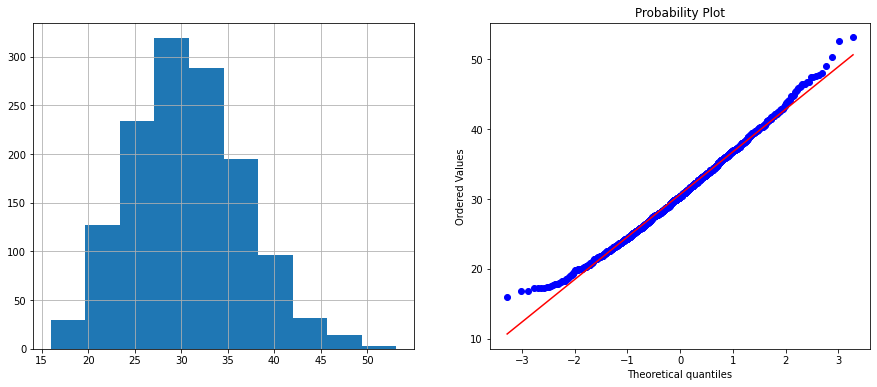

In [17]:
plots(df,'bmi')

bmi variables seems to be well skwened ( median=mode=mean)

<AxesSubplot:xlabel='charges'>

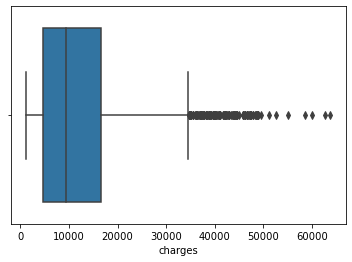

In [18]:
sns.boxplot(x='charges',data=df)

In [ ]:
#charges has oitliers values but they are significant 

<AxesSubplot:xlabel='bmi'>

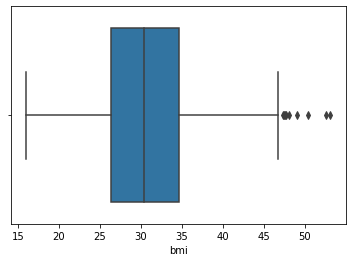

In [19]:
sns.boxplot(x='bmi',data=df)

In [ ]:
# as we can see there are oitliers values in bmi , before dealing with 
# we want to make sure if this will effect the correlation with charges

In [ ]:
#lomplot will help us vizualize the relaion between bmi and charges 

age         0.299008
bmi         0.198341
children    0.067998
charges     1.000000
Name: charges, dtype: float64

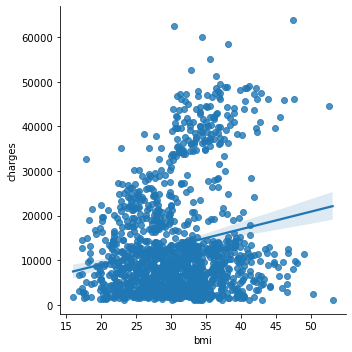

In [20]:
sns.lmplot(x='bmi',y='charges',data=df)
df.corr()['charges']

C:\Users\Toshiba\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


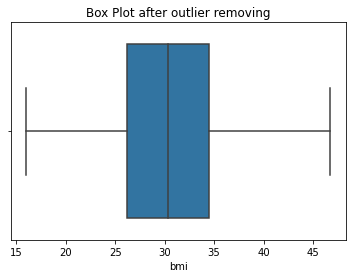

In [22]:
#we will try to drop the outliers in bmi 
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    #df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(df, 'bmi')
sns.boxplot(df['bmi'])
plt.title("Box Plot after outlier removing")
plt.show()

In [25]:
df['bmi'].describe()

count    1329.000000
mean       30.537348
std         5.919946
min        15.960000
25%        26.220000
50%        30.300000
75%        34.485000
max        46.750000
Name: bmi, dtype: float64

In [ ]:
#the ma of bmi is now 46 
#lets vizualise the correlation after dropping outliers 

age         0.302022
bmi         0.193196
children    0.069739
charges     1.000000
Name: charges, dtype: float64

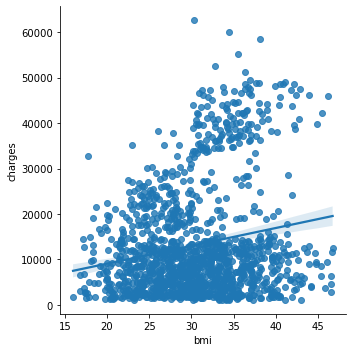

In [26]:
sns.lmplot(x='bmi',y='charges',data=df)
df.corr()['charges']

dropping  outliers did not effect the correlation wit target variable and that's a good sign 

<AxesSubplot:xlabel='age'>

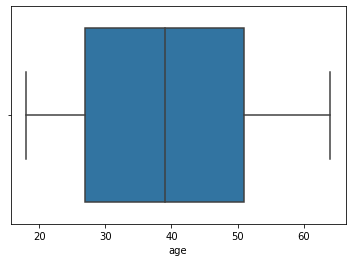

In [27]:
sns.boxplot(x='age',data=df)

In [28]:
df['age'].describe()

count    1329.000000
mean       39.203913
std        14.047835
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

age has no outliers 
it's range betweeb 18 and 64 
let's try to do some vizualisation

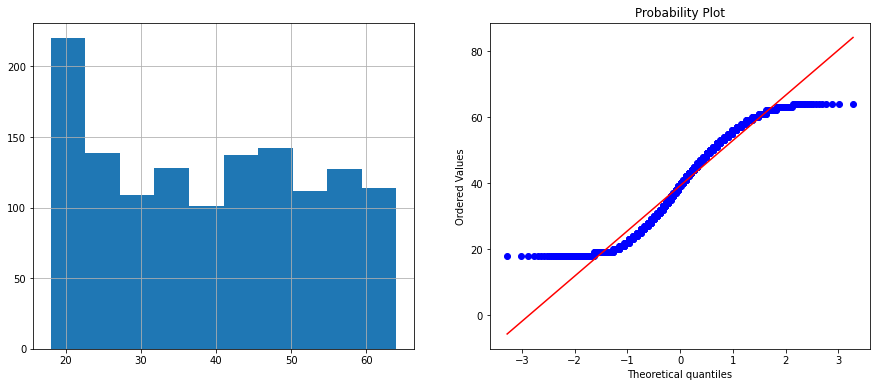

In [29]:
plots(df,'age')

C:\Users\Toshiba\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

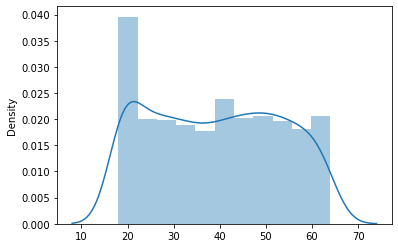

In [30]:
sns.distplot(x=df['age'],kde=True)

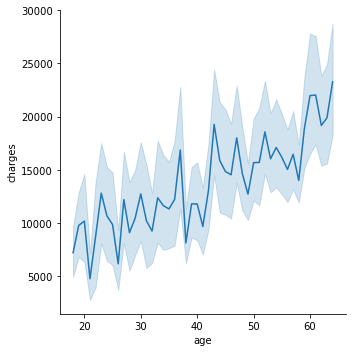

In [31]:
sns.relplot(data=df, x="age", y="charges", kind="line")


we can conclude from the grap above as people age increase the medical charges increases

age         0.302022
bmi         0.193196
children    0.069739
charges     1.000000
Name: charges, dtype: float64

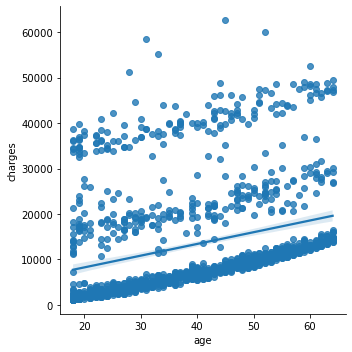

In [32]:
sns.lmplot(x='age',y='charges',data=df)
df.corr()['charges']

age  is not well related with charges 

In [ ]:
#let's analyse childen variable 

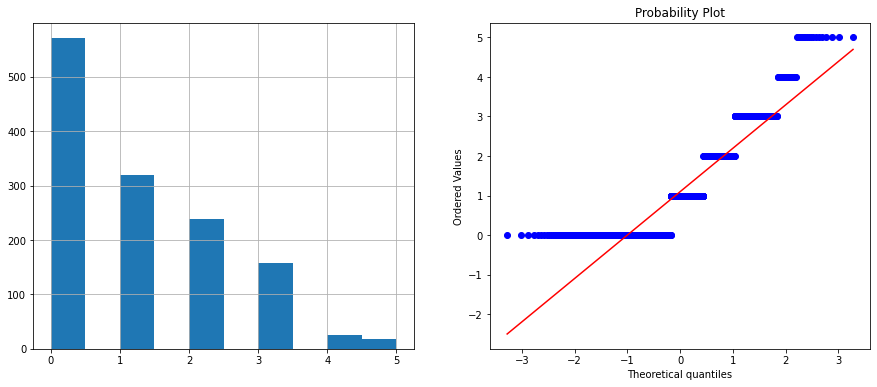

In [34]:
plots(df,'children')

<AxesSubplot:xlabel='children', ylabel='bmi'>

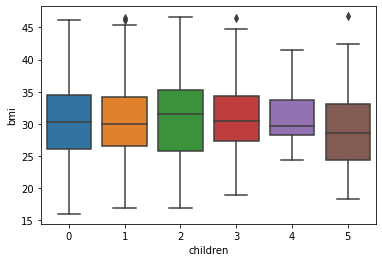

In [35]:
#most pf the client in data have one or zero children 
sns.boxplot(x='children',y='bmi',data=df)

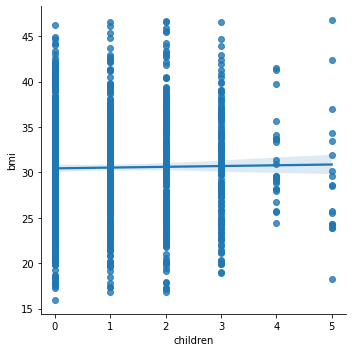

In [37]:
sns.lmplot(x='children',y='bmi',data=df)

<AxesSubplot:xlabel='smoker', ylabel='count'>

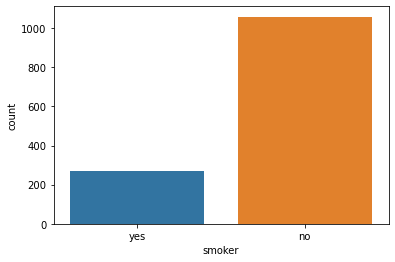

In [38]:
#now let's analyse the variable smoke 
sns.countplot(x='smoker',data=df)

In [ ]:
#the are less smokers and now let's try to see if smoker has a relation between bmi and age 


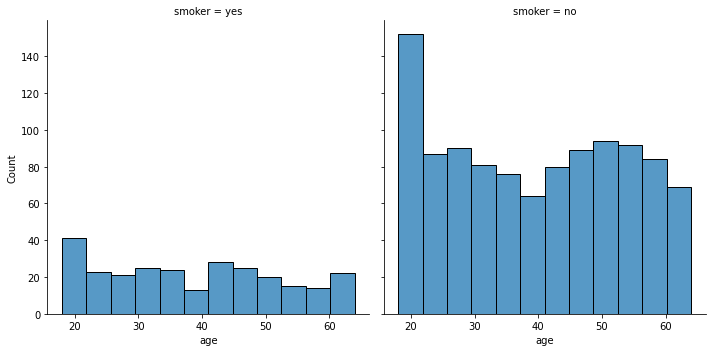

In [40]:
sns.displot(x='age',data=df,col='smoker')

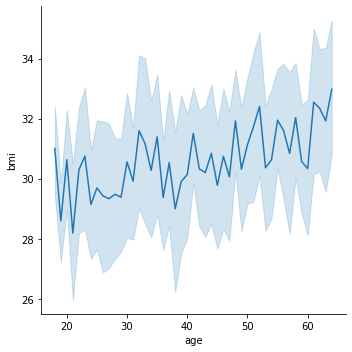

In [41]:
sns.relplot(data=df, x="age", y="bmi", kind="line")


we can coclude that no somkers are mostly betweeen 20 and 30 years old and there bmi is quite good 
and also more person gets old the higher his bmi 
it becomes less healthy

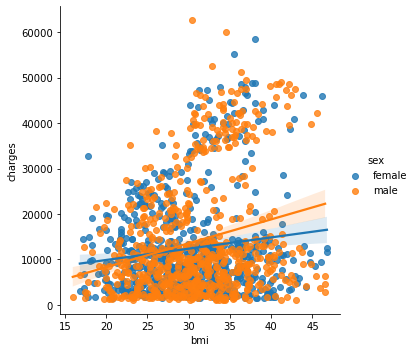

In [42]:
sns.lmplot(x='bmi',y='charges',data=df,hue='sex')

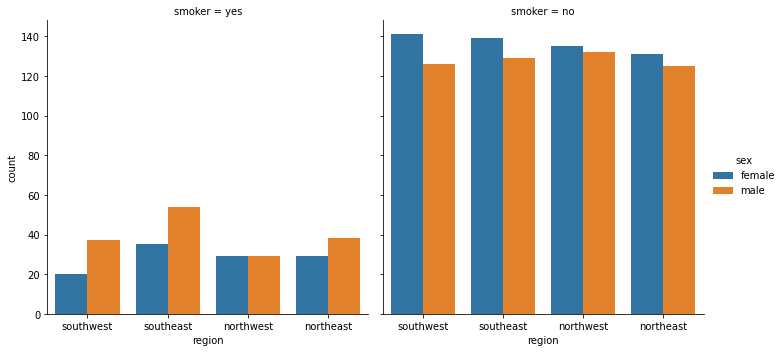

In [43]:
sns.catplot(x='region',hue='sex',col='smoker',data=df,kind='count')

In [ ]:
#most smokers are males and they are from souteast 
#most none somkers are females 